In [198]:
import numpy as np 
import matplotlib.pyplot as plt
import heapq
import cv2
import osmnx as ox
import networkx as nx
from math import radians, cos, sqrt


Trích xuất MAP từ google map 

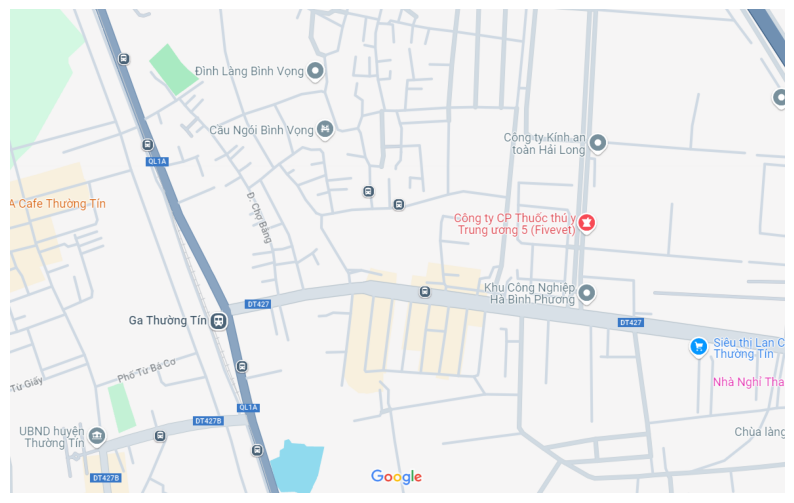

Image dimensions: 1182x738


array([[[226, 248, 211],
        [226, 248, 211],
        [226, 248, 211],
        ...,
        [245, 245, 246],
        [245, 245, 246],
        [245, 245, 246]],

       [[226, 248, 211],
        [226, 248, 211],
        [226, 248, 211],
        ...,
        [245, 245, 246],
        [245, 245, 246],
        [245, 245, 246]],

       [[226, 248, 211],
        [226, 248, 211],
        [226, 248, 211],
        ...,
        [245, 245, 246],
        [245, 245, 246],
        [245, 245, 246]],

       ...,

       [[226, 218, 208],
        [226, 218, 208],
        [226, 218, 208],
        ...,
        [245, 245, 246],
        [245, 245, 246],
        [245, 245, 246]],

       [[226, 218, 208],
        [226, 218, 208],
        [226, 218, 208],
        ...,
        [245, 245, 246],
        [245, 245, 246],
        [245, 245, 246]],

       [[226, 218, 208],
        [226, 218, 208],
        [226, 218, 208],
        ...,
        [245, 245, 246],
        [245, 245, 246],
        [245, 245, 246]]

In [199]:


img = cv2.imread('MAP.png')

if img is not None:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
    
    height, width = img.shape[:2]
    print(f"Image dimensions: {width}x{height}")
else:
    print("Error: Could not read the image. Please check if 'MAP.png' exists in the current directory.")

img



Chuyển ảnh về gray và đưa vào đồ thị

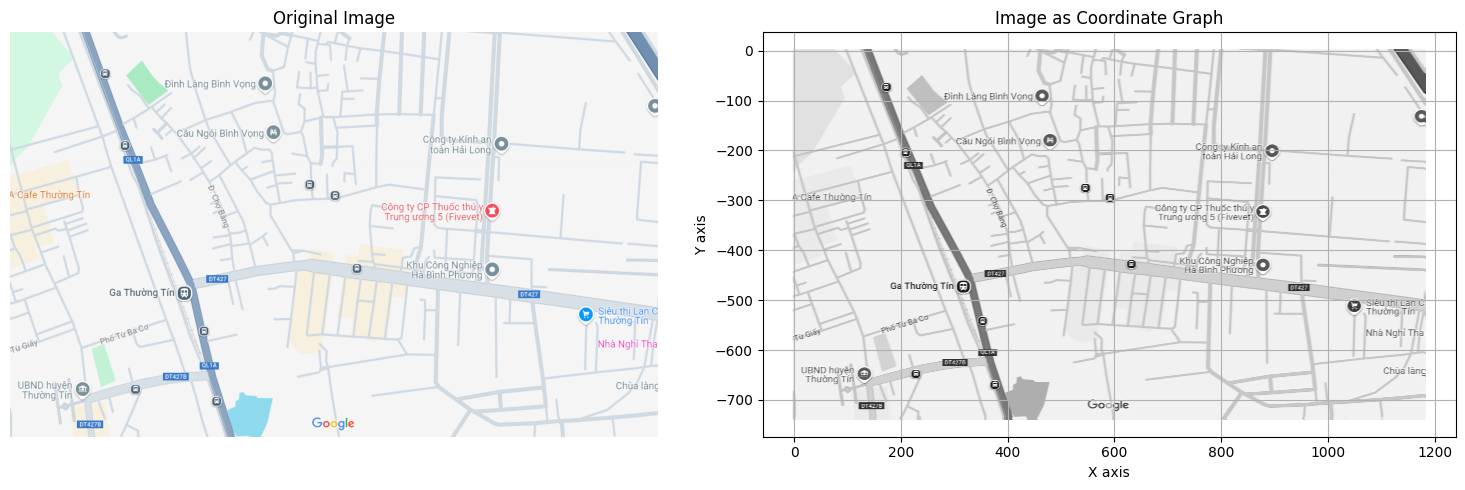

Graph dimensions: Width=1181, Height=737


In [200]:
# Đọc ảnh và chuyển sang ảnh xám
img = cv2.imread('MAP.png')
if img is not None:
    # Chuyển sang ảnh xám
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Tạo lưới tọa độ
    y, x = np.mgrid[0:gray.shape[0], 0:gray.shape[1]]
    
    # Tạo figure với 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Hiển thị ảnh gốc
    ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax1.set_title('Original Image')
    ax1.axis('off')
    
    # Hiển thị đồ thị tọa độ
    ax2.scatter(x.flatten(), -y.flatten(), c=gray.flatten(), cmap='gray', s=1)
    ax2.set_title('Image as Coordinate Graph')
    ax2.set_xlabel('X axis')
    ax2.set_ylabel('Y axis')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Graph dimensions: Width={x.max()}, Height={y.max()}")
else:
    print("Error: Could not read the image")

Lấy dữ liệu từ OSM 

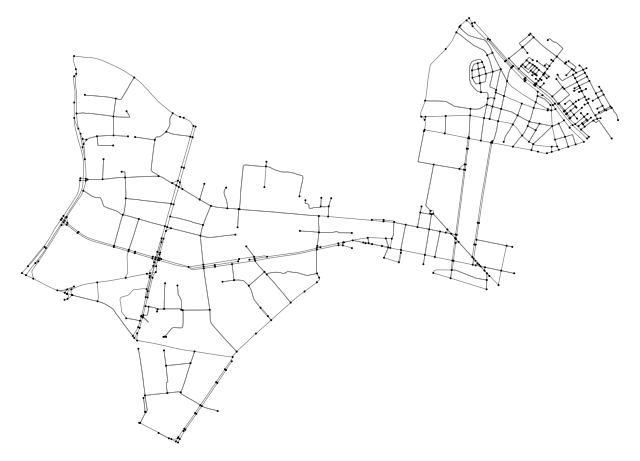

In [201]:

place_name = "Ba Dinh, Hanoi, Vietnam"

G = ox.graph_from_place(place_name, network_type="drive")

fig, ax = ox.plot_graph(G, node_size=2, edge_linewidth=0.5, bgcolor="white", node_color="black", edge_color="gray")


In thông tin đồ thị


In [ ]:
print(G)
edges = list(G.edges(data=True, keys=True))[:5]
for u, v, k, data in edges:
    print(f"{u} → {v}, key = {k}, data = {data}")

print(edges[:5])

MultiDiGraph with 571 nodes and 1207 edges
92383657 → 106107923, key = 0, data = {'osmid': 706715111, 'highway': 'secondary_link', 'lanes': '1', 'oneway': False, 'reversed': True, 'length': 16.92843309496095}
92383657 → 2326681501, key = 0, data = {'osmid': 703182856, 'highway': 'secondary', 'lanes': '2', 'name': 'Phố Kim Mã', 'oneway': True, 'reversed': False, 'length': 162.3473368348907, 'geometry': <LINESTRING (105.829 21.033, 105.829 21.033, 105.829 21.033, 105.828 21.032,...>}
92383660 → 438039400, key = 0, data = {'osmid': 28104599, 'highway': 'residential', 'name': 'Phố Vạn Bảo', 'oneway': False, 'reversed': True, 'length': 17.644725313445672}
92383660 → 106098001, key = 0, data = {'osmid': 28104599, 'highway': 'residential', 'name': 'Phố Vạn Bảo', 'oneway': False, 'reversed': False, 'length': 260.53243529051406, 'geometry': <LINESTRING (105.817 21.031, 105.817 21.031, 105.817 21.031, 105.817 21.032,...>}
92383660 → 438156126, key = 0, data = {'osmid': 805181678, 'highway': 'sec

In [203]:

ox.save_graphml(G, "badinh_hanoi_graph.graphml")  # Lưu dưới dạng file GraphML
Ba_Dinh_maps = ox.load_graphml("badinh_hanoi_graph.graphml")  # Tải lại khi cần


Thiết lập Graph có dạng Graph [node] = {[node, distance],[] . . . }

In [204]:
Edges =list (Ba_Dinh_maps.edges(data=True, keys=True))
Graph ={}
for node in Ba_Dinh_maps.nodes:
    Graph[node] = []
for node in Ba_Dinh_maps.nodes:
    for edges in Edges:
        if edges[0]== node:
                Graph[node].append([edges[1],edges[3]['length']]) 

            
    

In [205]:
for i in Graph.keys():
    print (i,Graph[i])
    print("\n")

92383657 [[106107923, 16.92843309496095], [2326681501, 162.3473368348907]]


92383660 [[438039400, 17.644725313445672], [106098001, 260.53243529051406], [438156126, 133.85767960700952]]


98032857 [[106107169, 212.9890431704664], [6647118938, 41.318177280957485], [106103833, 466.77862347814204]]


98034547 [[320503711, 211.04406665945322], [5828495464, 83.69901032819435]]


98034555 [[6689723520, 46.45821882379262], [8237661942, 181.35686978802215]]


98042452 [[106099279, 304.00747570053], [1745116722, 112.16119616992113]]


98043218 [[317129394, 21.653652472872775], [98042452, 97.56908416950581], [5719160874, 35.54601921484122]]


98044811 [[12084664206, 18.772443714608098], [6670759499, 44.866384192496305], [6661112990, 51.54251294456222], [998227806, 40.579647284973504]]


98044875 [[6611608743, 32.531786284457894], [6661112990, 32.58599706355287], [103063759, 59.78235198558916]]


98045869 [[2290010746, 10.625460049810476], [10164900086, 160.52168680454363]]


98047219 [[663883902

Euclid distance tính theo Kinh độ và Vĩ độ

In [206]:
def euclidean_distance(current, goal):
    lat1 = Ba_Dinh_maps.nodes[current]['y']
    lon1 = Ba_Dinh_maps.nodes[current]['x']
    lat2 = Ba_Dinh_maps.nodes[goal]['y']
    lon2 = Ba_Dinh_maps.nodes[goal]['x']
    
    lat_mean = radians((lat1 + lat2) / 2)
    
    dx = (lon2 - lon1) * 111320 * cos(lat_mean)
    dy = (lat2 - lat1) * 111320
    
    return sqrt(dx**2 + dy**2)



Heuristic + A* func

In [207]:
def heuristic_bfs(start, goal):
    if start == goal:
        return 0
        
    parent_nodes = {}
    parent_nodes[start] = None
    frontier = []
    frontier.append(start)
    explored = []
    
    while frontier:
        current = frontier.pop(0)
        if current == goal:
            explored.append(current)
            break
        explored.append(current)
        for node in Graph[current]:
            if node[0] not in explored and node[0] not in frontier:
                frontier.append(node[0])
                parent_nodes[node[0]] = current
                
    if goal not in parent_nodes:
        return float('inf')
        
    return calculate_distance_bfs(parent_nodes, start, goal)

def calculate_distance_bfs(parent_nodes, start, goal):
    try:
        distance = 0
        current = goal
        while current != start:
            if current not in parent_nodes or parent_nodes[current] not in Graph:
                return float('inf')
            parent = parent_nodes[current]
            # Tìm khoảng cách giữa current và parent
            for node, dist in Graph[parent]:
                if node == current:
                    distance += dist
                    break
            current = parent
        return distance
    except KeyError:
        return float('inf')

def a_star(graph, start, goal):
    if start not in graph or goal not in graph:
        return None
        
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {node: float('inf') for node in graph}
    g_score[start] = 0
    f_score = {node: float('inf') for node in graph}
    f_score[start] = euclidean_distance(start, goal)
    # A star with heuristic calculate by euclid distance / bfs (not recommended) 
    while open_set:
        _, current = heapq.heappop(open_set)
        if current == goal:
            return reconstruct_path(came_from, current)

        for neighbor_data in graph[current]:
            neighbor = neighbor_data[0]
            if neighbor not in graph:  
                continue
            cost = neighbor_data[1]
            tentative_g_score = g_score[current] + cost
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + euclidean_distance(neighbor, goal)
                
                heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None

def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.append(current)
    total_path.reverse()
    return total_path

def path_to_edges(path):
    return [(path[i], path[i + 1]) for i in range(len(path) - 1)]



Mẫu với điểm đầu và điểm cuối random

In [211]:

start = 92383657

goal = 12559133535

path = a_star(Graph, start, goal)


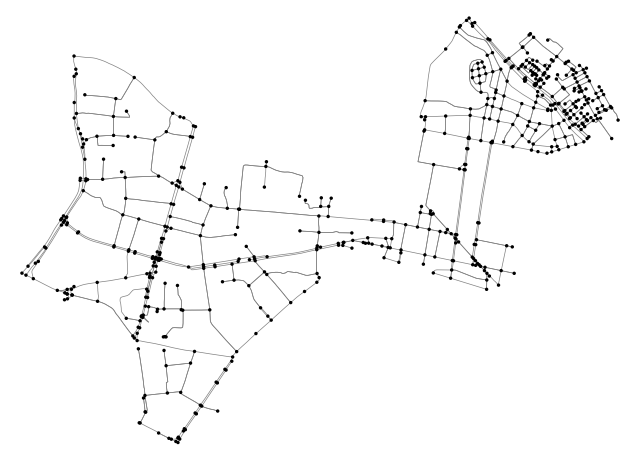

Tìm thấy đường đi
Path: [92383657, 2326681501, 10171614217, 317968427, 106106169, 10173304893, 92383660, 438156126, 2175069059, 11273447986, 2195289147, 420457785, 2332625931, 5719623127, 6658034553, 1755770094, 2295384940, 6658015910, 442983002, 5721511586, 420458778, 8333134381, 442993813, 436388447, 309685730, 319080891, 2195296719, 6644721587, 11107112929, 11107112919, 12559133535]
162.3473368348907


32.571107866422565


451.51494873647624


118.79478884512625


136.02688026572892


322.0558608724153


133.85767960700952


253.53668221864388


14.694109496814473


11.374144102072126


25.760766241607605


16.98594780701622


29.370587237278322


32.95043312674627


77.42671001170159


25.228551169800603


13.490478144605264


107.03967093428993


72.45325910107472


171.32139140217257


5.701550081230104


39.56669259631416


60.16312219717927


91.19459516409151


453.39028361304673


231.434709491029


453.39028361304673


4.444012138409958


231.43470949102905


4.4440121384099

In [212]:
# Đầu tiên vẽ graph cơ bản
fig, ax = ox.plot_graph(Ba_Dinh_maps, 
                       node_size=6, 
                       edge_linewidth=0.5,
                       bgcolor="white",
                       node_color="black",
                       edge_color="gray")

# Sau đó vẽ đường đi nếu tìm thấy
if path:
    print("Tìm thấy đường đi")
    ox.plot_graph_route(Ba_Dinh_maps, 
                       path, 
                       route_linewidth=6, 
                       route_color="red", 
                       fig=fig, 
                       ax=ax)
    plt.show()  # Hiển thị plot
else:
    print("Không tìm thấy đường đi")
print(f"Path: {path}")
distance =0 
for i in path:
    for node in Graph[i]:
        if node[0] in path:
            distance += node[1]
            print(node[1])
            print("\n")
print(f"Path length: {distance}")


Check lại với Dijkstra

In [213]:

def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    return path[::-1]  

def Dijkstra(start, goal, Graph):
    """ Thuật toán Dijkstra tìm đường đi ngắn nhất từ start đến goal """
    if start not in Graph or goal not in Graph:
        return None
    
    open_set = []
    heapq.heappush(open_set, (0, start))  

    came_from = {}  
    g_score = {node: float('inf') for node in Graph}  
    g_score[start] = 0  

    while open_set:
        current_cost, current = heapq.heappop(open_set)
        if current == goal:
            return reconstruct_path(came_from, current)

        for neighbor_data in Graph[current]:  
            neighbor, cost = neighbor_data  
            tentative_g_score = g_score[current] + cost
            if tentative_g_score < g_score[neighbor]:  
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                heapq.heappush(open_set, (g_score[neighbor], neighbor))

    return None  

path = Dijkstra(92383657, 12559133535, Graph)
print(f"Path from {start} to {goal}:")
new_distance = 0
for i in path:
    print(i)
    print('\n')
for i in path:
    for node in Graph[i]:
        if node[0] in path:
            new_distance += node[1]
print(f"Path length: {new_distance}")


Path from 92383657 to 12559133535:
92383657


2326681501


10171614217


317968427


106106169


10173304893


92383660


438156126


2175069059


11273447986


2195289147


420457785


2332625931


5719623127


6658034553


1755770094


2295384940


6658015910


442983002


5721511586


420458778


8333134381


442993813


436388447


309685730


319080891


2195296719


6644721587


11107112929


11107112919


12559133535


Path length: 3851.196148402794
